# Netflix Movie Data Analysis Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Overview

In [2]:
df = pd.read_csv("mymoviedb.csv", engine="python")
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


# Data Cleaning & Preprocessing

In [27]:
df['Vote_Count'] = df['Vote_Count'].astype('Int64')
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25803 entries, 0 to 25802
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  25793 non-null  Int64  
 1   Title         25794 non-null  object 
 2   Popularity    25793 non-null  float64
 3   Vote_Count    25792 non-null  Int64  
 4   Vote_Average  0 non-null      float64
 5   Genre         25792 non-null  object 
dtypes: Int64(2), float64(2), object(2)
memory usage: 1.2+ MB


In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9826.0,9826.000000
mean,40.320570,1392.943721,6.439467
std,108.874308,2611.303856,1.129797
min,7.100000,0.0,0.000000
25%,16.127500,146.0,5.900000
50%,21.191000,444.0,6.500000
75%,35.174500,1376.0,7.100000
max,5083.954000,31077.0,10.000000


In [8]:
df['Release_Date'] = df['Release_Date'].astype(str)
df['Release_Date'] = df['Release_Date'].str.extract(r'(\d{4})')
df['Release_Date'] = df['Release_Date'].astype('Int64')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   Int64  
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9826 non-null   Int64  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: Int64(2), float64(2), object(5)
memory usage: 711.0+ KB


## Dropping Columns

In [9]:
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis=1, inplace=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


## Categorizing Vote_Average column
### Numerical Vote_Averages are converted into categorical labels to make insights more understandable for non-technical stakeholders.


In [10]:
def categorize_col(df, col, labels):
    
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe() ['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df

In [11]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [12]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


#### we're splitting genres into a list and then exploding our dataframe to have only one genre per row for each movie

In [14]:
df['Genre'] = df['Genre'].str.split(', ')
# explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [15]:
df.nunique()

Release_Date     102
Title           9514
Popularity      8160
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

# Data Visualization

In [16]:
df['Genre'].describe()

count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

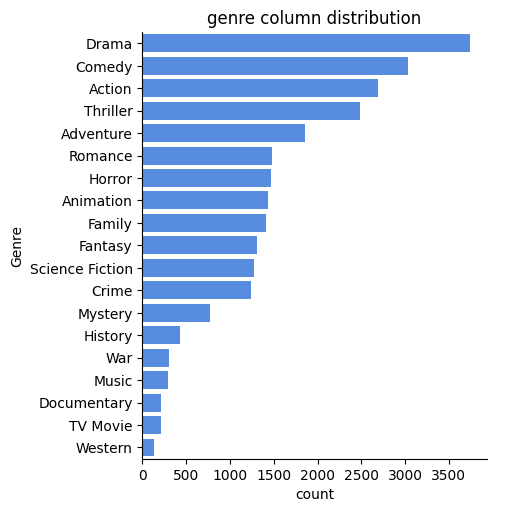

In [19]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
 order = df['Genre'].value_counts().index,
 color = '#4287f5')
plt.title('genre column distribution')
plt.show()

## From the above graph we can conclude that:
### Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.


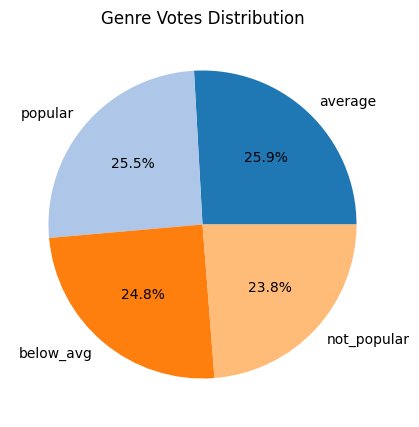

In [23]:
vote_counts = df['Vote_Average'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(vote_counts, labels=vote_counts.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Genre Votes Distribution')
plt.show()

## From the above graph we can conclude that:
### The distribution of genre votes is almost uniform across all categories, this indicates that the dataset has a balanced spread of movie ratings

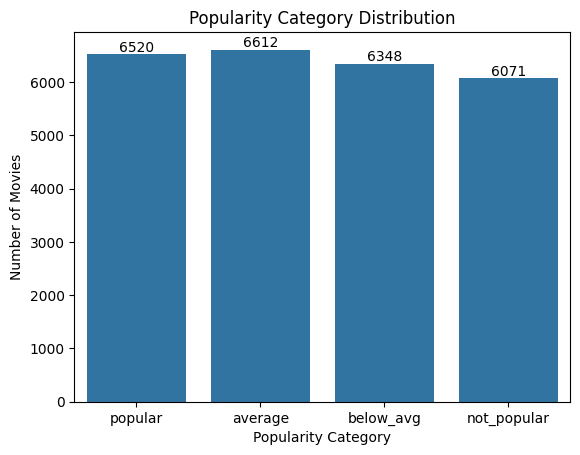

In [25]:
order = ['popular', 'average', 'below_avg', 'not_popular']
ax = sns.countplot(data=df, x='Vote_Average', order=order)

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Popularity Category Distribution')
plt.xlabel('Popularity Category')
plt.ylabel('Number of Movies')
plt.show()

## From the above graph we can conclude that:
### Most movies fall under the average and popular categories, while below average and not popular movies have relatively fewer entries.

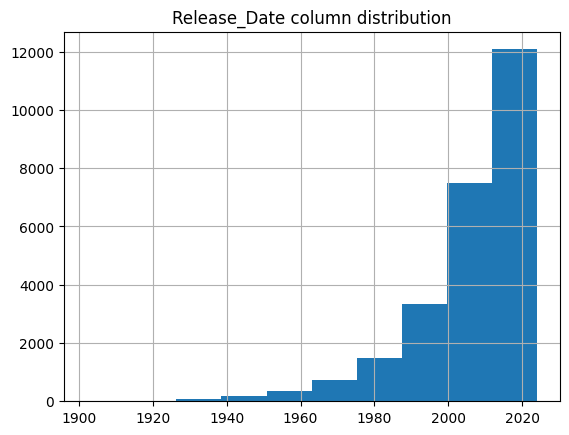

In [26]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()

## From the above graph we can conclude that:
### The year 2020 has the highest filmming rate in our dataset

In [37]:
top_movie = df.loc[df['Popularity'].idxmax()]
top_movie[['Title', 'Popularity']]

Title         Spider-Man: No Way Home
Popularity                   5083.954
Name: 0, dtype: object

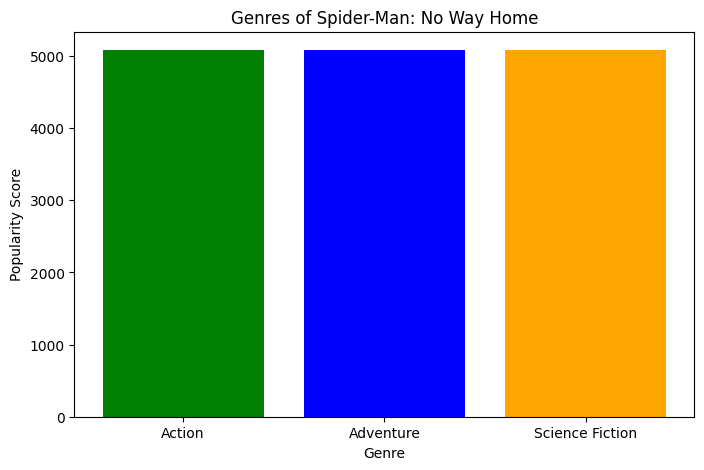

In [36]:
top_movie_genres = df[df['Title'] == top_movie['Title']]
colors = ['green', 'blue', 'orange']
plt.figure(figsize=(8,5))
plt.bar(top_movie_genres['Genre'], top_movie_genres['Popularity'], color=colors)
plt.title(f"Genres of {top_movie['Title']}")
plt.xlabel('Genre')
plt.ylabel('Popularity Score')
plt.show()

## From the above table and graph we can conclude that:
### Spider-Man: No Way Home has the highest popularity rate in the dataset and it has genres of Adventure and Science Fiction .